## Program8

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [21]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

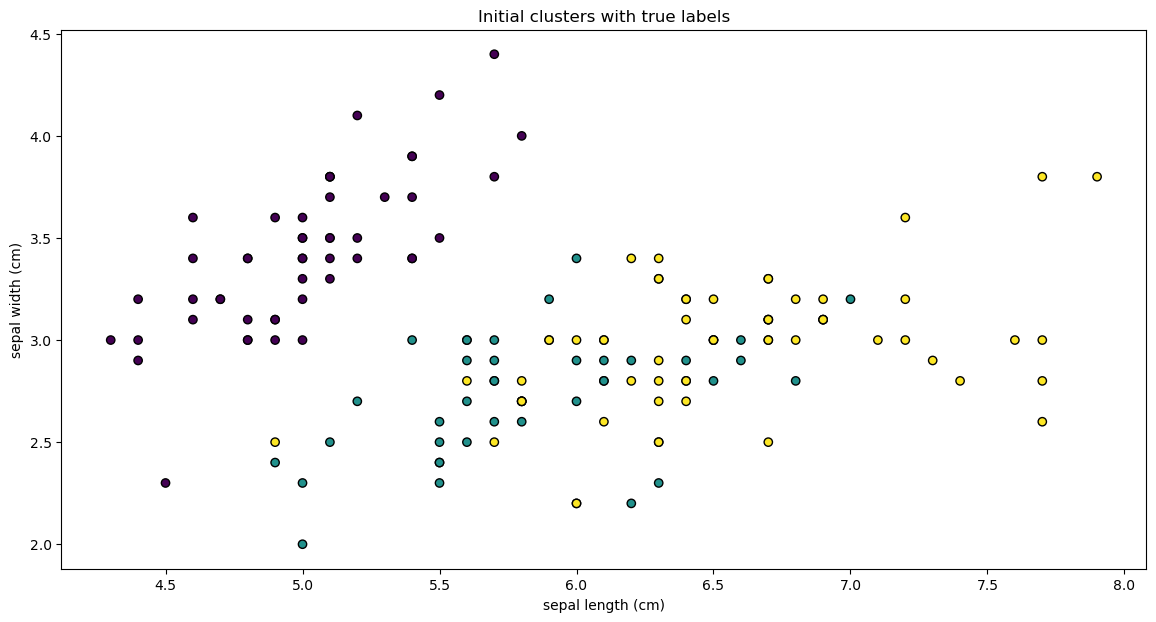

In [33]:
plt.figure(figsize = (14,7))

plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis', marker='o', edgecolor = 'k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Initial clusters with true labels")
plt.show()

In [37]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

y_predict = classifier.predict(x_test)
print(f"confusion matrix {confusion_matrix(y_test, y_predict)}")
print(f"Classification Report {classification_report(y_test, y_predict)}")

confusion matrix [[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Program7

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Kmeans Clustering :  0.5528190123564095
EM (gmm) clustering:  0.5011761635067206


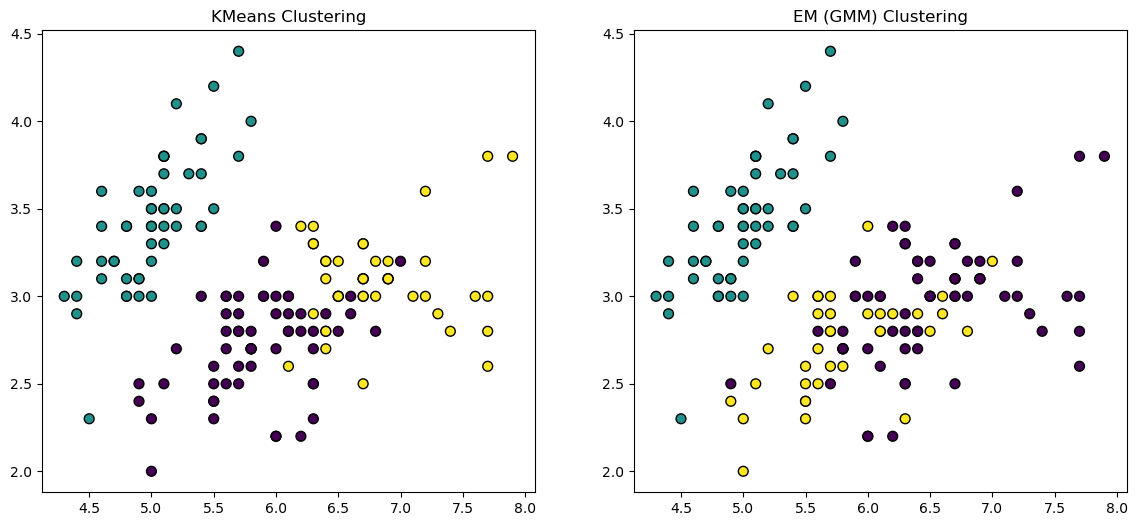

k-Means clustering provides better quality clusters according to the silhouette score.


In [45]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

iris = datasets.load_iris()
x = iris.data
y = iris.target

kmeans  = KMeans(n_clusters = 3, random_state=42)
kmeans_label = kmeans.fit_predict(x)
kmeans_silhouette = silhouette_score(x, kmeans_label)

gmm  = GaussianMixture(n_components = 3, random_state=42)
gmm_labels = gmm.fit_predict(x)
gmm_silhouette = silhouette_score(x, gmm_labels)

print("Kmeans Clustering : ", kmeans_silhouette)
print("EM (gmm) clustering: ",gmm_silhouette)

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (14,6))
ax1.scatter(x[:, 0], x[:,1], c=kmeans_label, cmap='viridis', marker='o', edgecolor = 'k', s=50)
ax1.set_title('KMeans Clustering')


ax2.scatter(x[:, 0], x[:, 1], c=gmm_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
ax2.set_title('EM (GMM) Clustering')

plt.show()

# Step 5: Comment on the quality of clustering
if kmeans_silhouette > gmm_silhouette:
    print("k-Means clustering provides better quality clusters according to the silhouette score.")
else:
    print("EM (GMM) clustering provides better quality clusters according to the silhouette score.")

## Program9

In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [110]:
def locally_weighted_regression(x, y, tau):
    m = x.shape[0]
    y_pred = np.zeros(m)

    for i in range(m):
        weights = np.array([kernel(x[i], x[j], tau) for j in range(m)])
        w = np.diag(weights)
        theta = np.linalg.pinv(x.T @ w @ x) @ x.T @ w @ y
        y_pred[i] = x[i] @ theta  # Update y_pred with predictions

    return y_pred

np.random.seed(0)
x = np.linspace(0,10,100)
y = np.sin(x) + np.random.normal(scale = 0.1, size = x.shape)

x_bias = np.c_[np.ones(x.shape[0]),x]
tau = 0.5
y_pred = locally_weighted_regression(x_bias, y, tau)

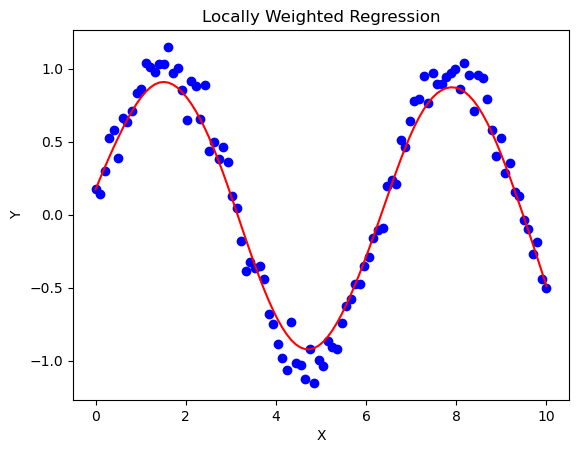

In [112]:
plt.scatter(x, y, color = 'blue', label = 'Data Points')
plt.plot(x,y_pred, color = 'red', label = 'LWR Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Locally Weighted Regression')
plt.show()

## Program10

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [71]:
#Load the datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [77]:
#train the svm classifier
svm_classifier = SVC(kernel = 'linear', C=1.0, random_state = 42)
svm_classifier.fit(x_train, y_train)

y_pred = svm_classifier.predict(x_test)
print(f"Confusion Matrix {confusion_matrix(y_test, y_pred)}")
print(f"Classification Report {classification_report(y_test, y_pred)}")
print(f"Accuracy Score {accuracy_score(y_test, y_pred)}")

Confusion Matrix [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy Score 1.0


## Program 6

In [83]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

In [91]:
heartdisease = pd.read_csv('heart.csv')
heartdisease = heartdisease.replace('?', np.nan)

print("First 5 instances: ")
print(heartdisease.head())

print("Atributes and Datatypes: ")
print(heartdisease.dtypes)

First 5 instances: 
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  heartdisease  
0  0    6             0  
1  3    3             2  
2  2    7             1  
3  0    3             0  
4  0    3             0  
Atributes and Datatypes: 
age               int64
sex               int64
cp                int64
trestbps          int64
chol              int64
fbs               int64
restecg           int64
thalach           int64
exang             int64
oldpeak         float64
slope             int64
ca               object
thal             object

In [101]:
model = BayesianNetwork([('age','heartdisease'),('sex','heartdisease'),('exang','heartdisease'),('cp','heartdisease'),('heartdisease','restecg'),('heartdisease','chol')])
print("Learning CPD using Maximum likelihood estimators")
model.fit(heartdisease, estimator = MaximumLikelihoodEstimator)

print('\n Inferencing with Bayesian Network:')
heartdiseasetest_infer = VariableElimination(model)

print('\n 1. Probability of HeartDisease given evidence = restecg')
q1 = heartdiseasetest_infer.query(variables = ['heartdisease'], evidence = {'restecg': 1})
print(q1)
print('\n 2. Probability of HeartDisease given evidence = cp')
q2 = heartdiseasetest_infer.query(variables = ['heartdisease'], evidence = {'cp': 2})
print(q2)

Learning CPD using Maximum likelihood estimators

 Inferencing with Bayesian Network:

 1. Probability of HeartDisease given evidence = restecg
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.1016 |
+-----------------+---------------------+
| heartdisease(1) |              0.0000 |
+-----------------+---------------------+
| heartdisease(2) |              0.2361 |
+-----------------+---------------------+
| heartdisease(3) |              0.2017 |
+-----------------+---------------------+
| heartdisease(4) |              0.4605 |
+-----------------+---------------------+

 2. Probability of HeartDisease given evidence = cp
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.3742 |
+-----------------+---------------------+
| heartdisease(1) |              0.2018 |
+----